<a href="https://colab.research.google.com/github/MustafaGhaziTalab/MCSD2123-01/blob/main/MCSD2123-01%20/README.md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install --upgrade pandas mlxtend matplotlib

In [7]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Importing necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the data from GitHub
data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)

# Displaying the first few rows of the dataframe to verify the data
print(df.head())

# Exploratory Data Analysis (EDA) - checking for missing values
print(df.isnull().sum())

# Preparing the data for association rule mining
# Converting the data into a list of transactions
grouped = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Initializing the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Applying the Apriori algorithm to find frequent itemsets with a specified minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Displaying frequent itemsets
print(frequent_itemsets)

# Generating association rules from frequent itemsets with a specified minimum confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Displaying the association rules
print(rules)

# Sorting rules by confidence and lift to find the most significant ones
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Displaying sorted rules
print(sorted_rules.head())

# If you encounter any deprecation warnings or other issues, you may need to update your libraries by uncommenting and running the following command:
# !pip install --upgrade pandas mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Member_number      0
Date               0
itemDescription    0
dtype: int64
      support                               itemsets
0    0.039504                             (UHT-milk)
1    0.112058                                 (beef)
2    0.056804                              (berries)
3    0.036148                            (beverages)
4    0.082623                         (bottled beer)
..        ...                                    ...
347  0.015492            (whole milk, soda, sausage)
348  0.018590  (whole milk, sausage, tropical fruit)
349  0.014717          (whole milk, sausage, yogurt)
350  0.010586     (whole milk, soda, tropical fruit)
351  0.011361   (yogurt, whole milk, tropical fruit)

[352 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 Most Frequently Purchased Items:
               Item  Frequency
0        whole milk       1545
1  other vegetables       1146
2           sausage        924
3    tropical fruit        879
4        rolls/buns        815
5   root vegetables        729
6      citrus fruit        722
7              soda        651
8       frankfurter        580
9            yogurt        560
Top Association Rules:
                         antecedents   consequents  antecedent support  \
389         (meat, other vegetables)  (whole milk)            0.020139   
336                    (white bread)  (whole milk)            0.026853   
364  (citrus fruit, root vegetables)  (whole milk)            0.028660   
432       (yogurt, other vegetables)  (whole milk)            0.035889   
466                  (soda, sausage)  (whole milk)            0.035889   

     consequent support   support  confidence      lift  leverage  conviction  \
389            0.327137  0.010586    0.525641  1.606794  0.003998    1

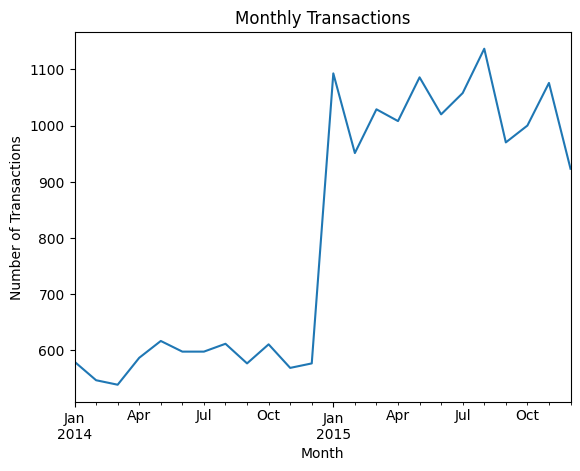

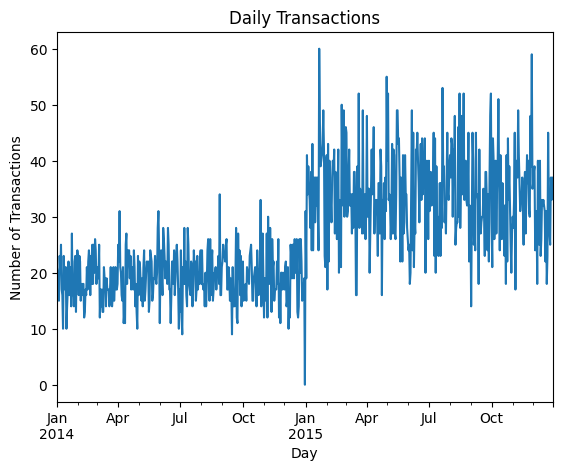

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime

# Assuming the dataset has already been loaded into a DataFrame 'df'

# Product Demand Analysis
# Calculate the frequency of each item
item_frequencies = df['itemDescription'].value_counts().reset_index()
item_frequencies.columns = ['Item', 'Frequency']

# Display the top 10 most frequently bought items
print("Top 10 Most Frequently Purchased Items:")
print(item_frequencies.head(10))

# Combination Analysis
# Find frequent itemsets and rules
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display rules sorted by confidence and lift
print("Top Association Rules:")
print(rules.sort_values(['confidence', 'lift'], ascending=[False, False]).head())

# Temporal Analysis
# Add a 'Date' column parsed from the 'Date' column in df
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Analyze transactions over time
monthly_transactions = df.set_index('Date').resample('M').size()
daily_transactions = df.set_index('Date').resample('D').size()

# Display the trend of transactions over months
monthly_transactions.plot(title='Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Display the trend of transactions over days
daily_transactions.plot(title='Daily Transactions')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

# These plots will help us understand on which months or days the transactions are higher
